In [27]:
import pandas as pd
import fastf1
import matplotlib.pyplot as plt
session = fastf1.get_session(2021,22,'R')
session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
c:\Users\Bartek\AppData\Local\Programs\Python\Python38-32\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
c:\Users\Bartek\AppData\Local\Programs\Python\Python38-32\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = p

In [28]:
#remember to debug the unknowntyre

#normalize time to start at the session's start
lapsDataFrame = session.laps
sessionFirstLap = lapsDataFrame["LapStartTime"].to_list()[0]
timeDelta = sessionFirstLap

In [29]:
#add columns with corrected timestamps to dataframe
lapsDataFrame = lapsDataFrame.assign(CorrectedLapStartTime = lambda x:(x["LapStartTime"]-timeDelta))
lapsDataFrame = lapsDataFrame.assign(CorrectedTime = lambda x:(x["Time"]-timeDelta))
lapsDataFrame = lapsDataFrame.assign(CorrectedPitOutTime = lambda x:(x["PitOutTime"]-timeDelta))
lapsDataFrame = lapsDataFrame.assign(CorrectedPitInTime = lambda x:(x["PitInTime"]-timeDelta))


In [30]:
rcm = session.race_control_messages
firstGreen = False
for x in range(len(rcm["Flag"].to_list())):
    if rcm["Flag"].to_list()[x] and firstGreen:
        raceStartTime = rcm["Time"].to_list()[x]
        break
    if rcm["Flag"].to_list()[x]=="GREEN":
        firstGreen = True
for x in range(len(rcm["Flag"].to_list())):
    if rcm["Flag"].to_list()[x]=="CHEQUERED":
        raceEndTime = rcm["Time"].to_list()[x]

print(raceStartTime, raceEndTime)

2021-12-12 13:03:22 2021-12-12 14:33:38


In [31]:

redFlagBeginnings = []
redFlagEndings = []
safetyCarEndings = []
safetyCarBeginnings = []
redFlag = False
safetyCar = False
for x in range(len(rcm["Flag"].to_list())):
    if not redFlag and rcm["Flag"].to_list()[x] == "RED":
        redFlagBeginnings.append(rcm["Time"].to_list()[x])
        redFlag = True
    if redFlag and rcm["Flag"].to_list()[x]=="GREEN":
        redFlagEndings.append(rcm["Time"].to_list()[x])
        redFlag = False
    if redFlag and rcm["Flag"].to_list()[x]=="CHEQUERED":
        redFlagEndings.append(rcm["Time"].to_list()[x])
    if rcm["Flag"].to_list()[x]=="CHEQUERED":
        raceEnd = rcm["Time"].to_list()[x]
for x in range(len(rcm["Status"].to_list())):
    if rcm["Status"].to_list()[x]=="DEPLOYED" and not safetyCar:
        safetyCar = True
        safetyCarBeginnings.append(rcm["Time"].to_list()[x])
    if rcm["Status"].to_list()[x]=="IN THIS LAP" and safetyCar:
        safetyCar = False
        safetyCarEndings.append(rcm["Time"].to_list()[x])
for x in range(len(redFlagBeginnings)):
    redFlagBeginnings[x]=redFlagBeginnings[x]-raceStartTime
    redFlagBeginnings[x]=(redFlagBeginnings[x].seconds + redFlagBeginnings[x].microseconds/1000000)/60
    redFlagEndings[x]=redFlagEndings[x]-raceStartTime
    redFlagEndings[x]=(redFlagEndings[x].seconds + redFlagEndings[x].microseconds/1000000)/60
for x in range(len(safetyCarBeginnings)):
    safetyCarBeginnings[x]=safetyCarBeginnings[x]-raceStartTime
    safetyCarBeginnings[x]=(safetyCarBeginnings[x].seconds + safetyCarBeginnings[x].microseconds/1000000)/60
    safetyCarEndings[x]=safetyCarEndings[x]-raceStartTime
    safetyCarEndings[x]=(safetyCarEndings[x].seconds + safetyCarEndings[x].microseconds/1000000)/60
raceEnd = raceEndTime-raceStartTime
raceEnd = (raceEnd.seconds + raceEnd.microseconds/1000000)/60

In [32]:
compoundColors = {
    'FreshSOFT': '#FF5F5F',
    'FreshMEDIUM': '#F9E75E',
    'FreshHARD': '#F0F0F0',
    'FreshINTERMEDIATE': '#39B54A',
    'FreshWET': '#00AEEF',
    'FreshUNKNOWN': '#555555',
    'UsedSOFT': '#6e1616', #6e1616 933030
    'UsedMEDIUM': '#4a4600', #4a4600  7c7600
    'UsedHARD': '#424242', #424242 999999
    'UsedINTERMEDIATE': '#2b8737',
    'UsedWET': '#0078a5',
    'UNKNOWN_False': '#444444',
    'TEST_UNKNOWN_False': '#555555',
    'TEST_UNKNOWN_True': '#444444',
    'PersonalBest': '#b138dd'
}

In [33]:
compoundFontColors = {
    'FreshSOFT': '#000000',
    'FreshMEDIUM': '#000000',
    'FreshHARD': '#000000',
    'FreshINTERMEDIATE': '#000000',
    'FreshWET': '#000000',
    'FreshUNKNOWN': '#000000',
    'UsedSOFT': '#FFFFFF', #6e1616 933030
    'UsedMEDIUM': '#FFFFFF', #4a4600  7c7600
    'UsedHARD': '#FFFFFF', #424242 999999
    'UsedINTERMEDIATE': '#FFFFFF',
    'UsedWET': '#FFFFFF',
    'UNKNOWN_False': '#FFFFFF',
    'TEST_UNKNOWN_False': '#555555',
    'TEST_UNKNOWN_True': '#000000',
    'PersonalBest': '#000000'
}

In [34]:
drivers = ['33','44','55','22','10','77','4','14','31','16','5','3','18','47','11','6','99','63','7','9']

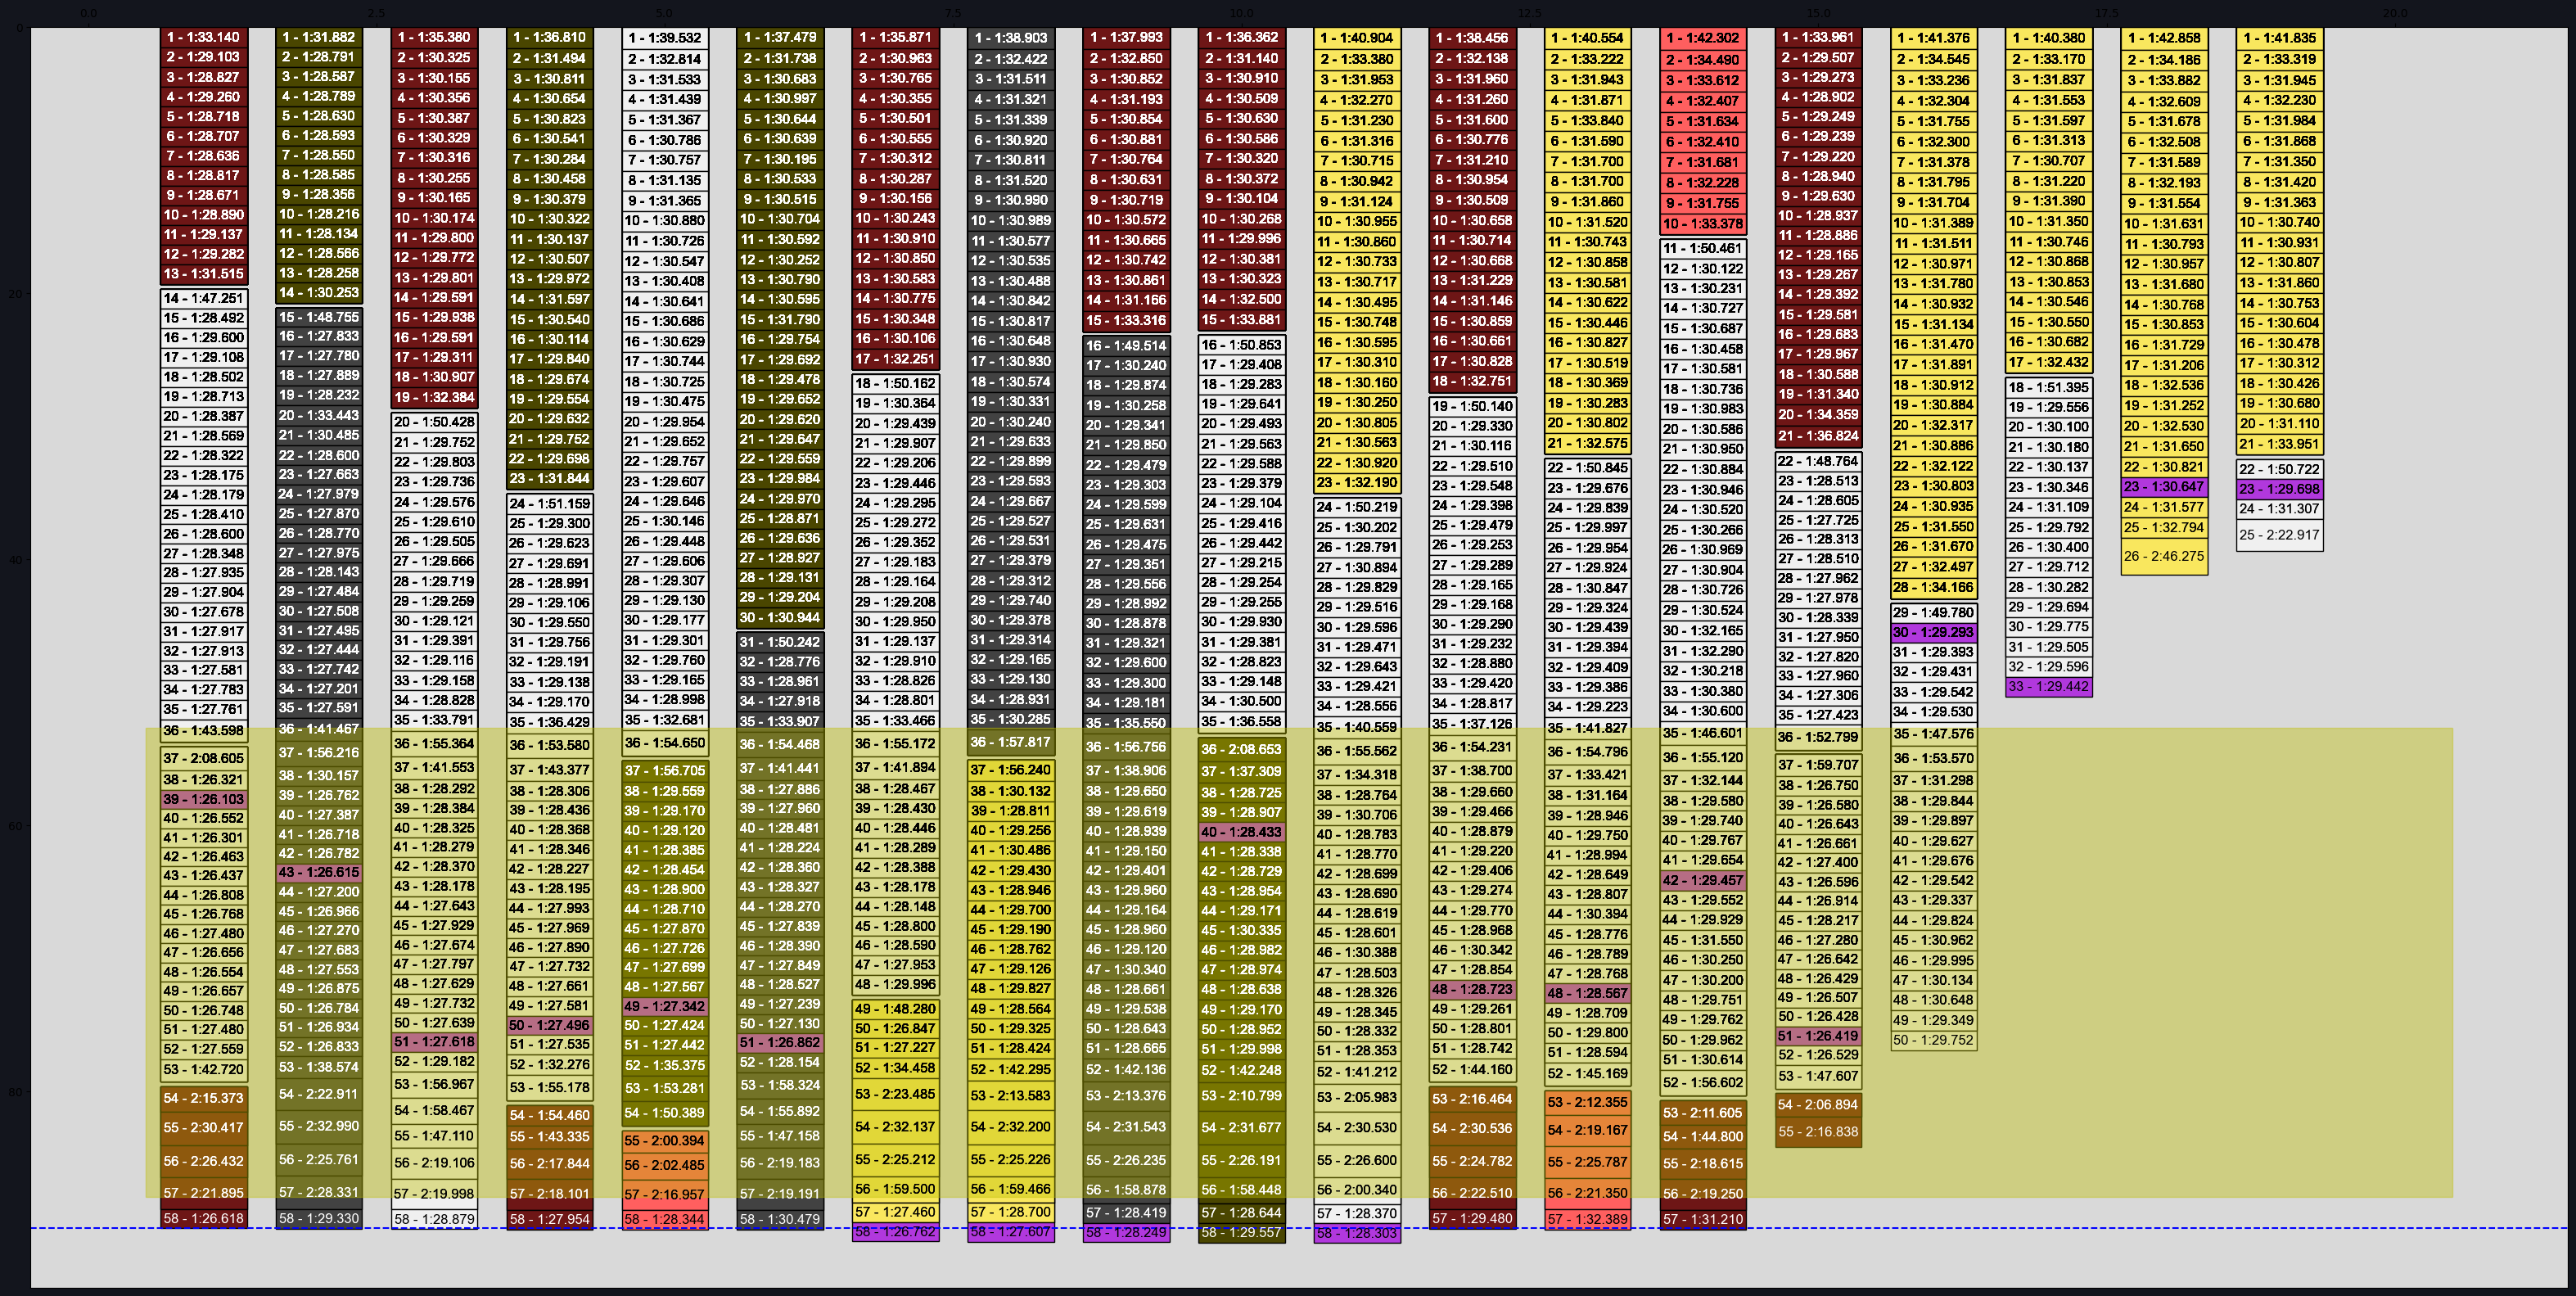

In [35]:

driverCounter = 0
plt.rcParams["figure.figsize"] = [40,20] #[40,20] for 10 teams [30,20] for less
fig, ax = plt.subplots()
plt.ylim(raceEnd*1.05,0)
ax.set_facecolor("#d9d9d9")
fig.set_facecolor("#13151d")
title = session.event["EventName"]+" 2022 "+session.name
for driverId in range(len(drivers)):
    driverCounter = driverCounter+1
    #fig.set_facecolor("#"+str(session.get_driver(driverpair[driverId]).TeamColor))
    singleDriverDataFrame = lapsDataFrame[lapsDataFrame["DriverNumber"]==drivers[driverId]]
    oldColumns = singleDriverDataFrame.columns.to_list()
    usefulColumns = ['DriverNumber','LapTime','LapNumber','CorrectedLapStartTime','CorrectedTime','CorrectedPitInTime','CorrectedPitOutTime','IsPersonalBest','Compound','FreshTyre']
    for x in oldColumns:
        if x not in usefulColumns:
            del singleDriverDataFrame[x]

    tyreColor = []
    rectangleStart = []
    rectangleStop = []
    lapTimes = []
    for i in range(len(singleDriverDataFrame["CorrectedLapStartTime"].to_list())):
        #tyre coloring
        if singleDriverDataFrame["IsPersonalBest"].to_list()[i]:
            tyreColor.append("PersonalBest")
        else:
            tyreString = ""
            if singleDriverDataFrame["FreshTyre"].to_list()[i]:
                tyreString = "Fresh"
            else:
                tyreString = "Used"
            tyreString = tyreString + singleDriverDataFrame["Compound"].to_list()[i]
            tyreColor.append(tyreString)
        #start of rectangle
        if pd.isnull(singleDriverDataFrame["CorrectedPitOutTime"].to_list()[i]) or i==0:
            rectangleStart.append((singleDriverDataFrame["CorrectedLapStartTime"].to_list()[i].seconds+singleDriverDataFrame["CorrectedLapStartTime"].to_list()[i].microseconds/1000000)/60)
        else:
            rectangleStart.append((singleDriverDataFrame["CorrectedPitOutTime"].to_list()[i].seconds+singleDriverDataFrame["CorrectedPitOutTime"].to_list()[i].microseconds/1000000)/60)
        #end of rectangle
        if pd.isnull(singleDriverDataFrame["CorrectedPitInTime"].to_list()[i]) or i==0:
            rectangleStop.append((singleDriverDataFrame["CorrectedTime"].to_list()[i].seconds+singleDriverDataFrame["CorrectedTime"].to_list()[i].microseconds/1000000)/60)
        else:
            rectangleStop.append((singleDriverDataFrame["CorrectedPitInTime"].to_list()[i].seconds+singleDriverDataFrame["CorrectedPitInTime"].to_list()[i].microseconds/1000000)/60)
        #lap times
        lapTime = str(singleDriverDataFrame["LapNumber"].to_list()[i])+" - "
        if not pd.isnull(singleDriverDataFrame["LapTime"].to_list()[i]):
            if len(str(singleDriverDataFrame["LapTime"].to_list()[i].seconds%60))==2:
                correctSeconds = str(singleDriverDataFrame["LapTime"].to_list()[i].seconds%60)
            else:
                correctSeconds = "0"+str(singleDriverDataFrame["LapTime"].to_list()[i].seconds%60)
            lapTime = lapTime+str(singleDriverDataFrame["LapTime"].to_list()[i].seconds//60)+":"+correctSeconds+"."+str(singleDriverDataFrame["LapTime"].to_list()[i].microseconds)[0:3]
            lapTimes.append(lapTime)
        else:
            lap = singleDriverDataFrame["CorrectedTime"].to_list()[i]-singleDriverDataFrame["CorrectedLapStartTime"].to_list()[i]
            if len(str(lap.seconds%60))==2:
                correctSeconds = str(lap.seconds%60)
            else:
                correctSeconds = "0"+str(lap.seconds%60)
            lapTime = lapTime+str(lap.seconds//60)+":"+correctSeconds+"."+str(lap.microseconds)[0:3]
            lapTimes.append(lapTime)
        for x in range(len(lapTimes)):
            plt.bar(driverCounter,rectangleStop[x]-rectangleStart[x],0.75,rectangleStart[x], color=compoundColors[tyreColor[x]], edgecolor = "black")
            plt.text(driverCounter,rectangleStop[x]-(rectangleStop[x]-rectangleStart[x])/2,lapTimes[x],fontsize = 12, color=compoundFontColors[tyreColor[x]],verticalalignment='center',horizontalalignment='center',fontfamily='Arial')
        #plt.text() fontsize 15 short session 12 long
ax.xaxis.tick_top()
for r in range(len(redFlagBeginnings)):
    end = redFlagEndings[r]
    begin = redFlagBeginnings[r]
    rect = plt.Rectangle((0.5,end),driverCounter,begin-end,color = "r", alpha = 0.4)
    ax.add_patch(rect)
for r in range(len(safetyCarBeginnings)):
    end = safetyCarEndings[r]
    begin = safetyCarBeginnings[r]
    rect = plt.Rectangle((0.5,end),driverCounter,begin-end,color = "y", alpha = 0.4)
    ax.add_patch(rect)
plt.axhline(y=raceEnd, color = "b", linestyle = "--")
plt.savefig(title+".png")


In [22]:
lec = lapsDataFrame[lapsDataFrame["DriverNumber"]=="16"]
session.laps.pick_driver('16').get_telemetry()

c:\Users\Bartek\AppData\Local\Programs\Python\Python38-32\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
c:\Users\Bartek\AppData\Local\Programs\Python\Python38-32\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
c:\Users\Bartek\AppData\Local\Programs\Python\Python38-32\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.il

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-07-31 13:03:06.185,0 days 01:02:05.807000,,0.090556,0 days 00:00:00,10280,0,1,36,True,1,interpolation,0.010977,3.621619e-08,OnTrack,-1499,-101,2387
3,2022-07-31 13:03:06.236,0 days 01:02:05.858000,,0.090556,0 days 00:00:00.051000,10280,0,1,36,True,1,pos,0.009466,3.123285e-08,OnTrack,-1499,-102,2388
4,2022-07-31 13:03:06.311,0 days 01:02:05.933000,,0.090556,0 days 00:00:00.126000,10280,0,1,36,True,1,car,0.000000,0.000000e+00,OnTrack,-1498,-102,2388
5,2022-07-31 13:03:06.511,0 days 01:02:06.133000,22,0.090556,0 days 00:00:00.326000,10140,0,1,36,False,1,car,0.000000,0.000000e+00,OnTrack,-1498,-102,2388
6,2022-07-31 13:03:06.656,0 days 01:02:06.278000,22,0.045278,0 days 00:00:00.471000,8950,5,1,35,False,1,pos,0.249681,8.237764e-07,OnTrack,-1499,-102,2388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44964,2022-07-31 14:42:57.898,0 days 02:41:57.520000,,143.016389,0 days 01:39:51.713000,11197,242,6,100,False,1,pos,303052.106991,9.998633e-01,OnTrack,-1198,-354,2388
44965,2022-07-31 14:42:57.929,0 days 02:41:57.551000,,143.016389,0 days 01:39:51.744000,11364,243,6,100,False,1,car,303054.225556,9.998703e-01,OnTrack,-1212,-340,2388
44966,2022-07-31 14:42:58.138,0 days 02:41:57.760000,,143.016389,0 days 01:39:51.953000,11422,247,6,100,False,1,pos,303068.781586,9.999183e-01,OnTrack,-1300,-266,2388
44967,2022-07-31 14:42:58.169,0 days 02:41:57.791000,,143.016389,0 days 01:39:51.984000,11480,251,6,100,False,1,car,303070.958889,9.999255e-01,OnTrack,-1316,-252,2387


In [16]:
print(lapsdf)

                       Time Driver                LapTime  NumberOfLaps  \
0    0 days 01:03:34.445000     63                    NaT             1   
1    0 days 01:05:26.573000     63 0 days 00:01:52.128000             2   
2    0 days 01:06:57.166000     63 0 days 00:01:30.593000             3   
3    0 days 01:08:20.888000     63 0 days 00:01:23.722000             4   
4    0 days 01:09:44.842000     63 0 days 00:01:23.954000             5   
...                     ...    ...                    ...           ...   
1377 0 days 02:35:54.562000     10 0 days 00:01:25.989000            65   
1378 0 days 02:37:19.749000     10 0 days 00:01:25.187000            66   
1379 0 days 02:39:07.104000     10 0 days 00:01:47.355000            67   
1380 0 days 02:40:44.691000     10 0 days 00:01:37.587000            68   
1381 0 days 02:42:13.763000     10 0 days 00:01:29.072000            69   

      NumberOfPitStops             PitOutTime PitInTime  \
0                    0 0 days 00:24:55.9

In [ ]:
#style guide
#driver surnames: bahnschrift bold 25 white
#team logos 100x100
#driver pics 125x125
#https://www.formula1.com/en/teams.html